In [1]:
%reset
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu
from skimage import io, exposure 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from matplotlib import path
import pickle
import os
import sys
sys.path.append("/Users/xiaolihe/Documents/Computer-Vision-534/hw1")
import train
import test_xh
reload(train)
reload(test_xh)
%pylab inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


### Building Character features Database

Number of labeling components: 83


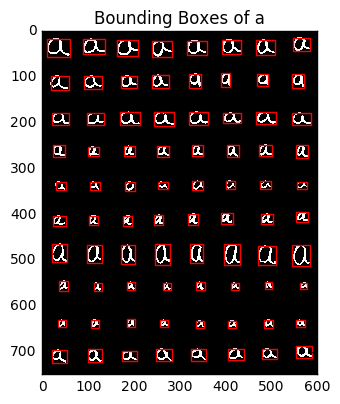

Number of labeling components: 90


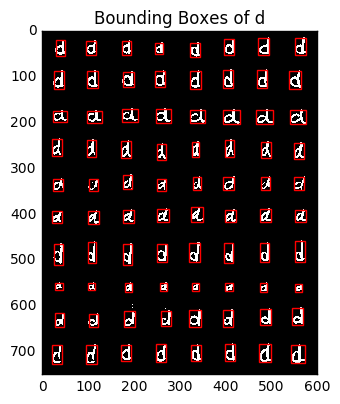

Number of labeling components: 114


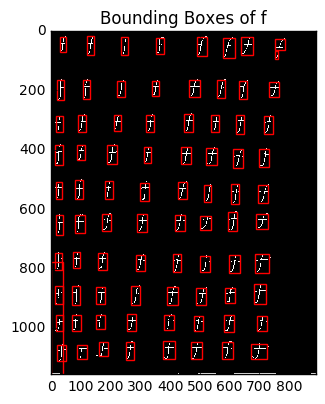

Number of labeling components: 96


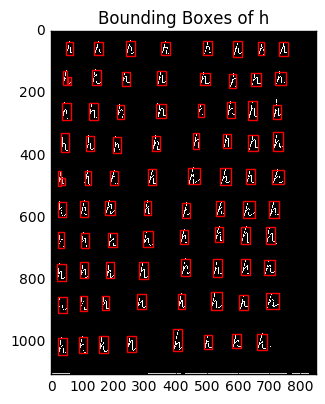

Number of labeling components: 109


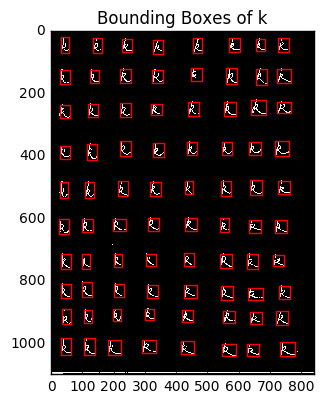

Number of labeling components: 82


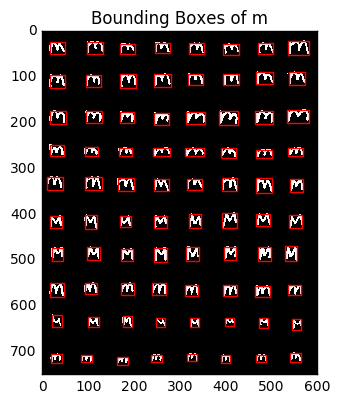

Number of labeling components: 81


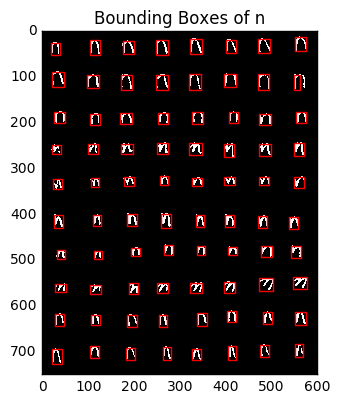

Number of labeling components: 103


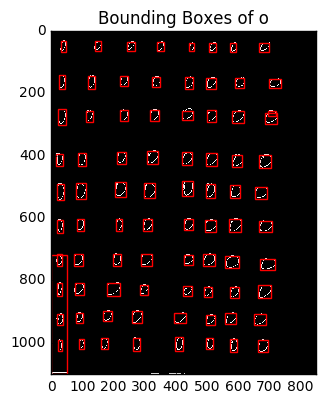

Number of labeling components: 81


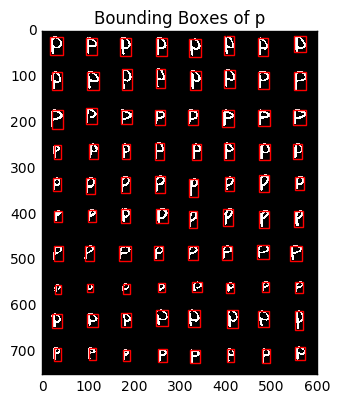

Number of labeling components: 87


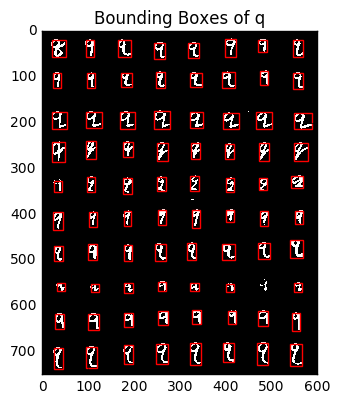

Number of labeling components: 83


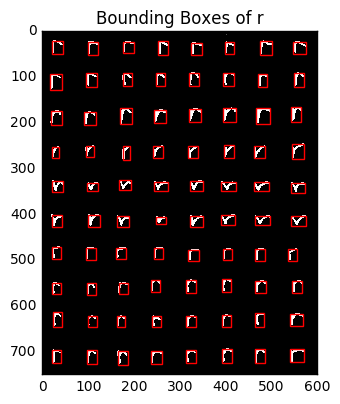

Number of labeling components: 95


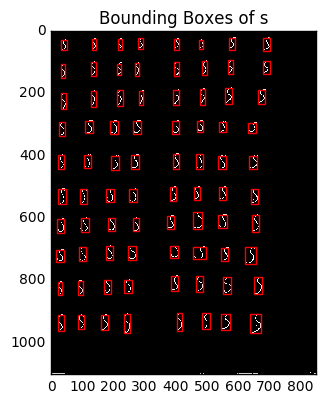

Number of labeling components: 86


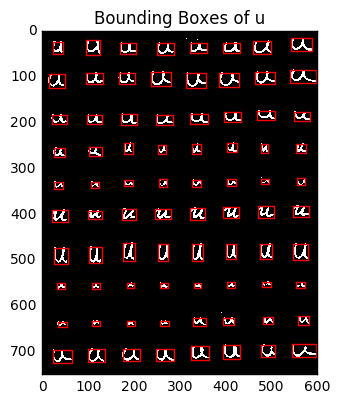

Number of labeling components: 85


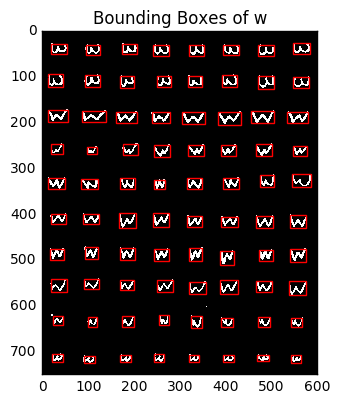

Number of labeling components: 116


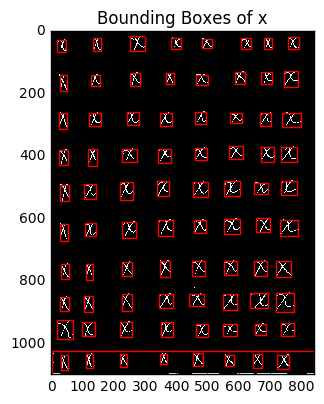

Number of labeling components: 122


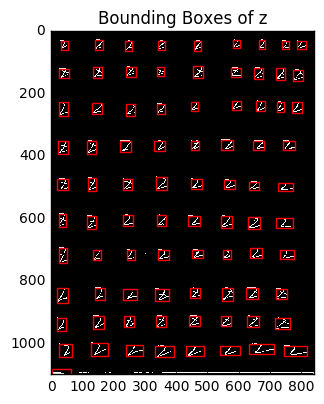

In [2]:
reload(train)
characters = ['a','d','f','h','k','m','n','o','p','q','r','s','u','w','x','z']
Features = []
class_labels = []
threshold_binary = 200
threshold_size = 10
display_idx = 0
improve_idx = 0
for c in characters:
    tmp_feature,tmp_class_label = train.feature_database(c,threshold_binary,threshold_size,display_idx,improve_idx)
    [Features.append(tf) for tf in tmp_feature]    
    [class_labels.append(tf) for tf in tmp_class_label]

### Normalization

In [3]:
# get features (exclude labels)
mean_features =  np.asarray(np.mean(Features,0))
std_features = np.asarray(np.std(Features,0))
print mean_features
print std_features
normed_features = [(x-mean_features)/std_features for x in Features]
## check:
# np.std(normed_features,0)
# print np.shape(normed_features)

[  6.82801713e-01   6.67859175e-01   2.53068742e-01   1.67210903e-01
   2.21407181e+01   2.58196531e+00  -2.87735407e-03]
[  7.36207481e-01   1.05354166e+01   4.78912767e+00   4.67408361e+00
   7.89709660e+02   8.71209438e+01   1.07073176e-01]


### Recognition on Training Data

//anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


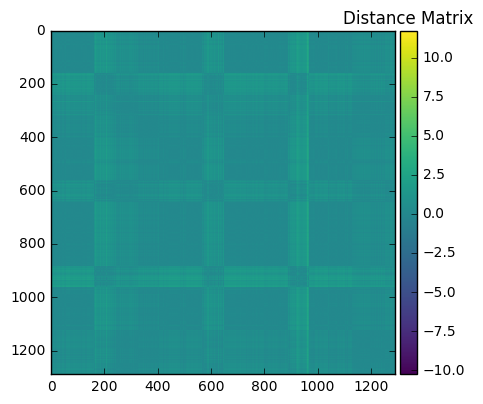

0.473643410853


//anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


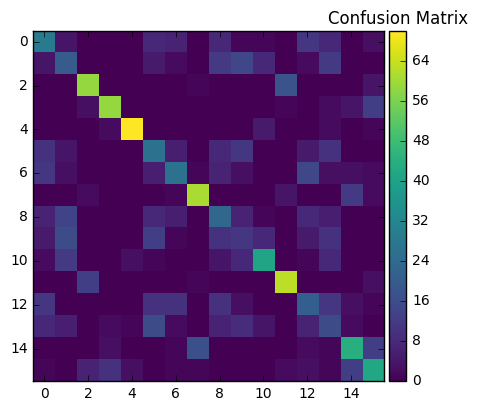

In [4]:
# def cal_knn(class_labels,num_k,x):
#     res = [class_labels[x[i]] for i in range(1,num_k)]
#     return max(set(res),key = res.count)
accuracy_train = 0
num_k = 2
D = cdist(normed_features, normed_features)
io.imshow(D,vmin = D.mean()-3*D.std(),vmax = D.mean()+3*D.std()) 
plt.title('Distance Matrix') 
io.show()
D_index = np.argsort(D, axis=1)
if improve_idx == 1:
    Ypred_train = [train.cal_knn(class_labels,num_k,x) for x in D_index]
else:
    Ypred_train = [class_labels[x[1]] for x in D_index]
accuracy_train = np.mean([Ypred_train[x] == class_labels[D_index[x][0]] for x in range(len(Ypred_train))])
print accuracy_train
## confusion matrix
confM = confusion_matrix(class_labels,Ypred_train)
io.imshow(confM) 
plt.title('Confusion Matrix') 
io.show()

### Testing (Recognition)

Number of labeling components: 70


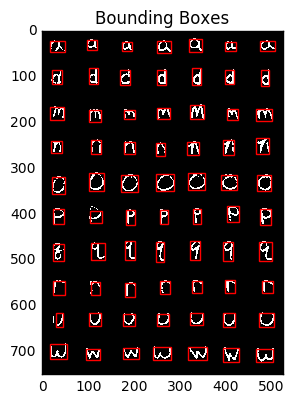

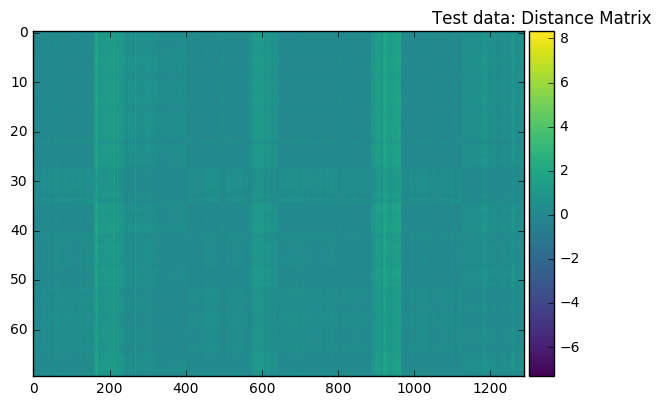

['a', 'w', 'n', 'a', 'n', 'a', 'a', 'd']
['w', 'a', 'w', 'a', 'p', 'w', 'n', 'u']
['w', 'm', 'm', 'a', 'm', 'a', 'n', 'm']
['n', 'a', 'm', 'a', 'n', 'n', 'x', 'x']
['o', 'x', 'x', 'a', 'd', 'a', 'a', 'q']
['d', 'z', 'n', 'd', 'q', 'r', 'w', 'u']
['u', 'r', 'k', 'r', 'x', 'k', 'k', 'k']
['a', 'x', 'x', 'w', 'z', 'u', 'u', 'z']
['z', 'z', 'r', 'w', 'q', 'x']
Number of labeling components: 80


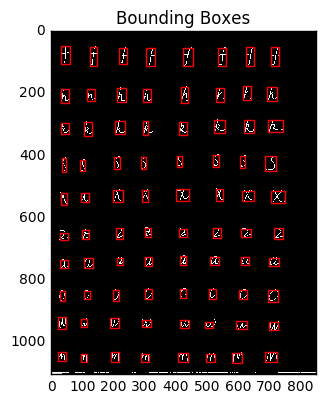

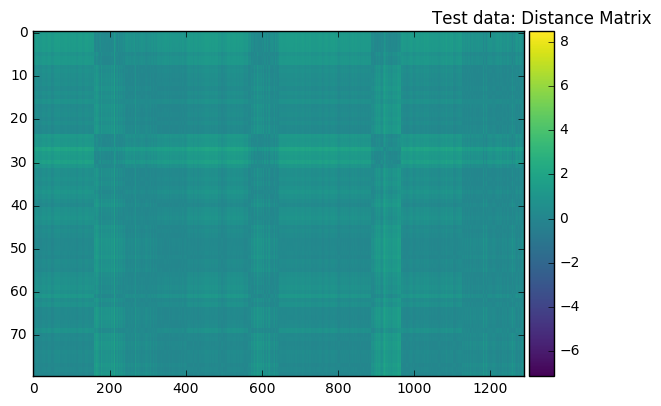

['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f']
['h', 'z', 'h', 'h', 'h', 'k', 'h', 'h']
['k', 'k', 'k', 'k', 'q', 'h', 'k', 'k']
['f', 's', 's', 's', 'f', 'f', 's', 's']
['x', 'x', 'o', 'z', 'o', 'o', 'o', 'o']
['w', 'z', 'z', 'z', 'z', 'z', 'z', 'h']
['a', 'a', 'z', 'a', 'u', 'x', 'z', 'a']
['x', 'z', 'o', 'o', 'x', 'o', 'x', 'o']
['u', 'n', 'n', 'n', 'z', 'z', 'n', 'n']
['n', 'u', 'x', 'a', 'a', 'w', 'n', 'u']


In [31]:
reload(test_xh)
reload(train)
num_k = 1
Ypred_test1,features_test1,regions1 = test_xh.Recognition('test1',normed_features, mean_features,std_features,class_labels,
                                             threshold_binary,threshold_size,display_idx,improve_idx,num_k)
for i in range(0,len(Ypred_test1),8):
    print Ypred_test1[i:i+8]
    
Ypred_test2,features_test2,regions2 = test_xh.Recognition('test2',normed_features, mean_features,std_features,class_labels,
                                             threshold_binary,threshold_size,display_idx,improve_idx)
for i in range(0,len(Ypred_test2),8):
    print Ypred_test2[i:i+8]

### Evaluate performance ( recognition rate)

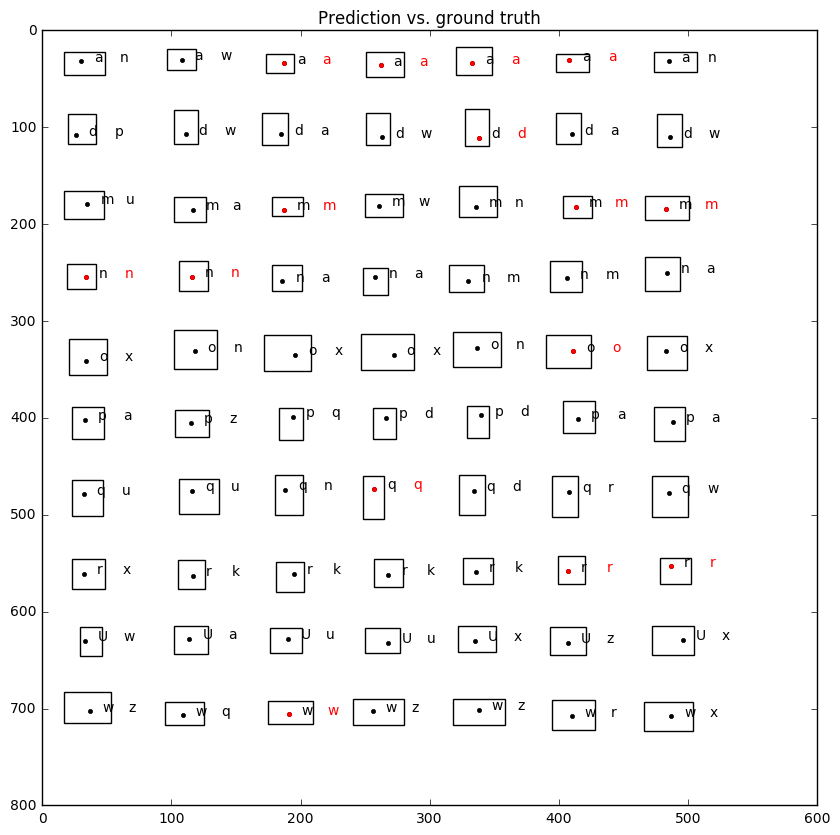

0.214285714286


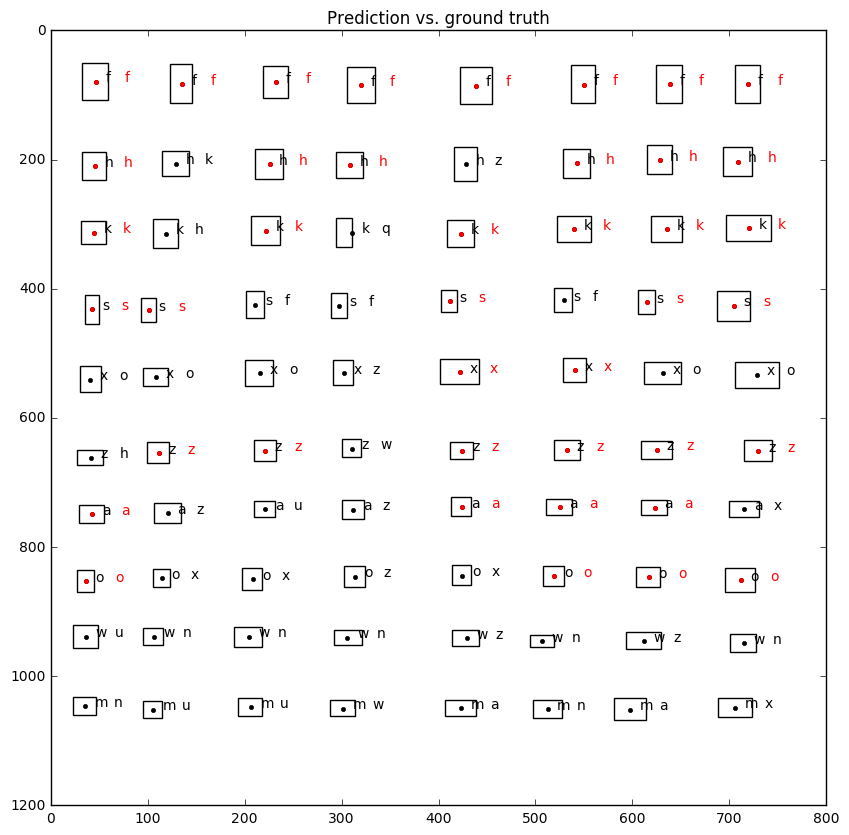

0.5125


In [34]:
reload(test_xh)
print test_xh.evaluate_ORC('test1_gt',regions1,Ypred_test1)
print test_xh.evaluate_ORC('test2_gt',regions2,Ypred_test2)

In [7]:
%reset
import sys
sys.path.append("/Users/xiaolihe/Documents/Computer-Vision-534/hw1")
import RunMyOCRRecogiton as rmr
%pylab inline
Ypred_test1, features_test1, regions1, accuracy = rmr.main_func('test1', 'test1_gt', 0, 1)

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


ImportError: No module named RunMyOCRRecogiton

AttributeError: 'module' object has no attribute 'main_func'

In [35]:
rmr

<module 'RunMyOCRRecogiton' from '/Users/xiaolihe/Documents/Computer-Vision-534/hw1/RunMyOCRRecogiton.py'>

In [7]:
num_k

15